Refining the post christmas model:

Variant 2 assumed 40% more infectious

Vaccinations begin on the 29th, $\rho = 0$ unitl this point then we set $\rho = \frac{63000}{7}$ (vaccinations per week) because a total of 819,676 vaccines had been given as of March 29th, a 91 day period. (source: Covid data hub) 



In [1]:
#relevant libraries\

import PyDSTool as dst
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# setting up initial conditions, parameters and variables
icdict = {'s': 1, 'l1':0, 'l2':0, 'i1': 1, 'i2':1, 'r':0, 'v': 0}
pardict = {'p':1, 'L': 4.7, 'beta1': 0.3332, 'beta2': 0.5644, 'c': 1, 'delta1': 0, 'delta2': 0, 'alpha': 10, 'N': 4900000, 'rho': 0, 'mu': 0}

# defining RHS of differential equations of the system
ds_rhs = 'mu * s - (beta1 * c * s * (i1/N)) - (beta2 * c * s * (i2/N)) - rho - mu * s'
dl1_rhs = '(beta1 * c * s * (i1/N)) + (1 - p)*(beta1 * c * v * (i1/N)) + (delta1) - ((1/L) * l1) - mu * l1'
dl2_rhs = '(beta2 * c * s * (i2/N)) + (1 - p)*(beta2 * c * v * (i2/N)) + (delta2) - ((1/L) * l2) - mu * l2'
di1_rhs = '((1/L) * l1) - (1/alpha * i1) - mu * i1'
di2_rhs = '((1/L) * l2) - (1/alpha * i2) - mu * i2'
dr_rhs = '(1/alpha) * (i1 +i2) - mu * r'
dv_rhs = 'rho - mu * v - (1 - p)*(beta2 * c * v * (i2/N)) - (1 - p)*(beta1 * c * v * (i1/N))'

vardict = {'s': ds_rhs, 'l1': dl1_rhs, 'l2': dl2_rhs, 'i1': di1_rhs, 'i2': di2_rhs, 'r': dr_rhs, 'v': dv_rhs} # tells DSTool that there are 5 dynamic state var's, specified by the eqns in the strings dS/dI/dR_rhs

DSargs = dst.args()
DSargs.name = 'SEIR3' # name the model
DSargs.ics = icdict # set initial condn's
DSargs.pars = pardict # set parameters
DSargs.tdata = [0, 20] # how long we expect to integrate for
DSargs.varspecs = vardict

#Generator
SEIR3 = dst.Generator.Vode_ODEsystem(DSargs)

In [3]:
# initial conditions on Dec 22nd, sourced from model 

s_9 = 4866551
l1_9 = 2059
i1_9 = 2653
l2_9 = 4075
i2_9 = 3505
r_9 = 25167

# Dec 22nd to 29th, Vaccinations begin

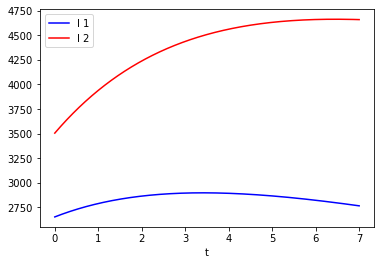

In [4]:
# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.16 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 0},
        ics={'i1': i1_9, 'l1': l1_9, 's': s_9, 'r': r_9, 'l2': l2_9, 'i2': i2_9, 'v': 0},
        tdata=[0,7]) # 22 Dec 2020 to 5 Apr 2021

# computing points for plotting 
traj_1 = SEIR3.compute('test')
pts_1 = traj_1.sample()

# creating plot
plt.plot(pts_1['t'], pts_1['i1'], label='I 1', color='b')
plt.plot(pts_1['t'], pts_1['i2'], label='I 2', color='r') 
#plt.plot(pts_1['t'], pts_1['s'], label='S', color='y')
#plt.plot(pts_1['t'], pts_1['v'], label='V', color='k')
#plt.plot(pts_1['t'], pts_1['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

## Peak Christmas cases

In [5]:
np.max(pts_1['i1'])

2897.8982590904156

In [6]:
np.max(pts_1['i2'])

4662.722061134421

# Dec 29th to Mar 1st, First schools return

In [7]:
# initial conditions on Dedc 22nd, sourced from model 

s_1 = pts_1['s'][-1]
l1_1 = pts_1['l1'][-1]
i1_1 = pts_1['i1'][-1]
l2_1 = pts_1['l2'][-1]
i2_1 = pts_1['i2'][-1]
r_1 = pts_1['r'][-1]
v_1 = pts_1['v'][-1]

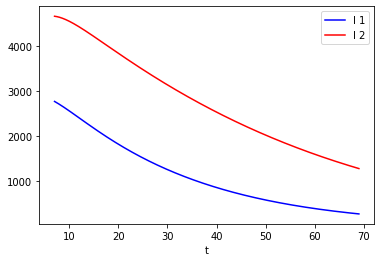

In [8]:
# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.16 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 63000/7},
        ics={'i1': i1_1, 'l1': l1_1, 's': s_1, 'r': r_1, 'l2': l2_1, 'i2': i2_1, 'v':v_1},
        tdata=[7,69]) # 22 Dec 2020 to 5 Apr 2021

# computing points for plotting 
traj_2 = SEIR3.compute('test')
pts_2 = traj_2.sample()

# creating plot
plt.plot(pts_2['t'], pts_2['i1'], label='I 1', color='b')
plt.plot(pts_2['t'], pts_2['i2'], label='I 2', color='r') 
#plt.plot(pts_1['t'], pts_1['s'], label='S', color='y')
#plt.plot(pts_1['t'], pts_1['v'], label='V', color='k')
#plt.plot(pts_1['t'], pts_1['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

# Mar 1st to 15th

In [9]:
# initial conditions on Mar 1st, sourced from model 

s_2 = pts_2['s'][-1]
l1_2 = pts_2['l1'][-1]
i1_2 = pts_2['i1'][-1]
l2_2 = pts_2['l2'][-1]
i2_2 = pts_2['i2'][-1]
r_2 = pts_2['r'][-1]
v_2 = pts_2['v'][-1]

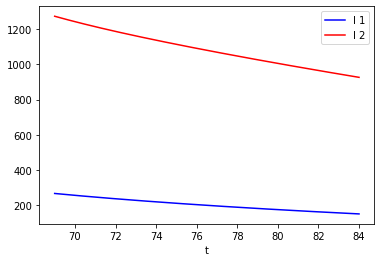

In [10]:
# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.18 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 63000/7},
        ics={'i1': i1_2, 'l1': l1_2, 's': s_2, 'r': r_2, 'l2': l2_2, 'i2': i2_2, 'v': v_2},
        tdata=[69,84]) 

# computing points for plotting 
traj_3 = SEIR3.compute('test')
pts_3 = traj_3.sample()

# creating plots
plt.plot(pts_3['t'], pts_3['i1'], label='I 1', color='b')
plt.plot(pts_3['t'], pts_3['i2'], label='I 2', color='r') 
#plt.plot(pts_1['t'], pts_1['s'], label='S', color='y')
#plt.plot(pts_1['t'], pts_1['v'], label='V', color='k')
#plt.plot(pts_1['t'], pts_1['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

# Mar 15th to Apr 12

In [11]:
# initial conditions on Mar 1st, sourced from model 

s_3 = pts_3['s'][-1]
l1_3 = pts_3['l1'][-1]
i1_3 = pts_3['i1'][-1]
l2_3 = pts_3['l2'][-1]
i2_3 = pts_3['i2'][-1]
r_3 = pts_3['r'][-1]
v_3 = pts_3['v'][-1]

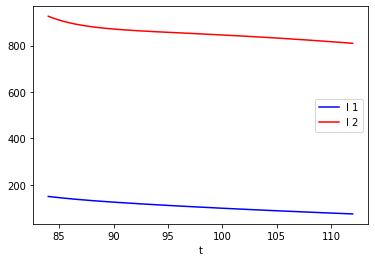

In [12]:
# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.25 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 63000/7},
        ics={'i1': i1_3, 'l1': l1_3, 's': s_3, 'r': r_3, 'l2': l2_3, 'i2': i2_3, 'v': v_3},
        tdata=[84,112]) 

# computing points for plotting 
traj_4 = SEIR3.compute('test')
pts_4 = traj_4.sample()

# creating plots
plt.plot(pts_4['t'], pts_4['i1'], label='I 1', color='b')
plt.plot(pts_4['t'], pts_4['i2'], label='I 2', color='r') 
#plt.plot(pts_1['t'], pts_1['s'], label='S', color='y')
#plt.plot(pts_1['t'], pts_1['v'], label='V', color='k')
#plt.plot(pts_1['t'], pts_1['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

In [13]:
pts_4

Pointset <no name> (parameterized)
Independent variable:
t:  [84.         84.01000357, ..., 111.98999643 112.        ]
Coordinates:
i1:  [149.48960817 149.43310069, ..., 74.19777325 74.17961607]
i2:  [926.30061949 926.10922134, ..., 809.66673339 809.63038223]
l1:  [43.69150978 43.70406445, ..., 26.34129049 26.33442098]
l2:  [345.30081078 345.48153958, ..., 363.46688771 363.44487046]
r:  [56380.77097898 56381.84702945, ..., 59062.74197464 59063.62612767]
s:  [4153164.44647279 4153073.39289015, ..., 3898763.61749485 3898672.78458258]
v:  [693000.         693090.03215434, ..., 944909.96784566 945000.        ]
Labels by index: Empty

# Summary Plot, Dec 22nd 2020 - Apr 12th 2021

In [14]:
daily_cases_i1_90 = np.concatenate((pts_1['i1'][1:-1:100],pts_2['i1'][1:-1:100],pts_3['i1'][1:-1:100] ,pts_4['i1'][1:-1:100]))
daily_cases_i2_90 = np.concatenate((pts_1['i2'][1:-1:100],pts_2['i2'][1:-1:100],pts_3['i2'][1:-1:100] ,pts_4['i2'][1:-1:100]))
days_elapsed = np.concatenate((pts_1['t'][1:-1:100],pts_2['t'][1:-1:100],pts_3['t'][1:-1:100] ,pts_4['t'][1:-1:100]))

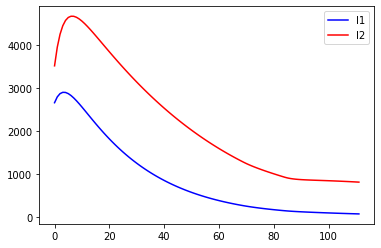

In [15]:
plt.plot(days_elapsed, daily_cases_i1_90, label='I1', color='b')
plt.plot(days_elapsed, daily_cases_i2_90, label='I2', color='r')
plt.legend()
plt.show()

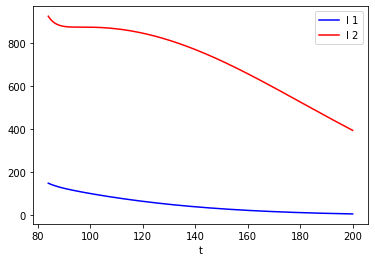

In [16]:
# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.26 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 63000/7},
        ics={'i1': i1_3, 'l1': l1_3, 's': s_3, 'r': r_3, 'l2': l2_3, 'i2': i2_3},
        tdata=[84,200]) 

# computing points for plotting 
traj_4 = SEIR3.compute('test')
pts_4 = traj_4.sample()

# creating plots
plt.plot(pts_4['t'], pts_4['i1'], label='I 1', color='b')
plt.plot(pts_4['t'], pts_4['i2'], label='I 2', color='r') 
#plt.plot(pts_1['t'], pts_1['s'], label='S', color='y')
#plt.plot(pts_1['t'], pts_1['v'], label='V', color='k')
#plt.plot(pts_1['t'], pts_1['r'], label='R', color='g')
plt.legend()
plt.xlabel('t')
plt.title('')
plt.show()

# Putting process into a single cell

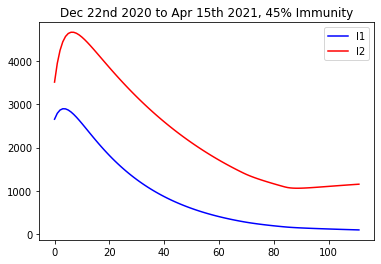

In [49]:
# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.16 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 63000/7, 'p': 0.45},
        ics={'i1': i1_1, 'l1': l1_1, 's': s_1, 'r': r_1, 'l2': l2_1, 'i2': i2_1, 'v':v_1},
        tdata=[7,69]) # 22 Dec 2020 to 5 Apr 2021

# computing points for plotting 
traj_2 = SEIR3.compute('test')
pts_2 = traj_2.sample()




# initial conditions on Mar 1st, sourced from model 

s_2 = pts_2['s'][-1]
l1_2 = pts_2['l1'][-1]
i1_2 = pts_2['i1'][-1]
l2_2 = pts_2['l2'][-1]
i2_2 = pts_2['i2'][-1]
r_2 = pts_2['r'][-1]
v_2 = pts_2['v'][-1]



# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.18 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 63000/7, 'p': 0.45},
        ics={'i1': i1_2, 'l1': l1_2, 's': s_2, 'r': r_2, 'l2': l2_2, 'i2': i2_2, 'v': v_2},
        tdata=[69,84]) 

# computing points for plotting 
traj_3 = SEIR3.compute('test')
pts_3 = traj_3.sample()


# initial conditions on Mar 1st, sourced from model 

s_3 = pts_3['s'][-1]
l1_3 = pts_3['l1'][-1]
i1_3 = pts_3['i1'][-1]
l2_3 = pts_3['l2'][-1]
i2_3 = pts_3['i2'][-1]
r_3 = pts_3['r'][-1]
v_3 = pts_3['v'][-1]



# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.25 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 63000/7, 'p': 0.45},
        ics={'i1': i1_3, 'l1': l1_3, 's': s_3, 'r': r_3, 'l2': l2_3, 'i2': i2_3, 'v': v_3},
        tdata=[84,112]) 

# computing points for plotting 
traj_4 = SEIR3.compute('test')
pts_4 = traj_4.sample()


daily_cases_i1_45 = np.concatenate((pts_1['i1'][1:-1:100],pts_2['i1'][1:-1:100],pts_3['i1'][1:-1:100] ,pts_4['i1'][1:-1:100]))
daily_cases_i2_45 = np.concatenate((pts_1['i2'][1:-1:100],pts_2['i2'][1:-1:100],pts_3['i2'][1:-1:100] ,pts_4['i2'][1:-1:100]))
days_elapsed = np.concatenate((pts_1['t'][1:-1:100],pts_2['t'][1:-1:100],pts_3['t'][1:-1:100] ,pts_4['t'][1:-1:100]))


plt.plot(days_elapsed, daily_cases_i1_45, label='I1', color='b')
plt.plot(days_elapsed, daily_cases_i2_45, label='I2', color='r')
plt.title('Dec 22nd 2020 to Apr 15th 2021, 45% Immunity')
plt.legend()
plt.show()

In [112]:
pts_4[1600]

i1:  122.54623791134595
i2:  1105.2101813581885
l1:  47.60266118701316
l2:  541.8421050732749
r:  59061.658030344835
s:  4006798.2408016818
v:  836332.8999824391

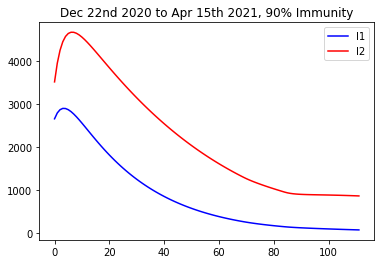

In [46]:
# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.16 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 63000/7, 'p': 0.9},
        ics={'i1': i1_1, 'l1': l1_1, 's': s_1, 'r': r_1, 'l2': l2_1, 'i2': i2_1, 'v':v_1},
        tdata=[7,69]) # 22 Dec 2020 to 5 Apr 2021

# computing points for plotting 
traj_2 = SEIR3.compute('test')
pts_2 = traj_2.sample()




# initial conditions on Mar 1st, sourced from model 

s_2 = pts_2['s'][-1]
l1_2 = pts_2['l1'][-1]
i1_2 = pts_2['i1'][-1]
l2_2 = pts_2['l2'][-1]
i2_2 = pts_2['i2'][-1]
r_2 = pts_2['r'][-1]
v_2 = pts_2['v'][-1]



# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.18 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 63000/7, 'p': 0.9},
        ics={'i1': i1_2, 'l1': l1_2, 's': s_2, 'r': r_2, 'l2': l2_2, 'i2': i2_2, 'v': v_2},
        tdata=[69,84]) 

# computing points for plotting 
traj_3 = SEIR3.compute('test')
pts_3 = traj_3.sample()


# initial conditions on Mar 1st, sourced from model 

s_3 = pts_3['s'][-1]
l1_3 = pts_3['l1'][-1]
i1_3 = pts_3['i1'][-1]
l2_3 = pts_3['l2'][-1]
i2_3 = pts_3['i2'][-1]
r_3 = pts_3['r'][-1]
v_3 = pts_3['v'][-1]



# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.25 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 63000/7, 'p': 0.9},
        ics={'i1': i1_3, 'l1': l1_3, 's': s_3, 'r': r_3, 'l2': l2_3, 'i2': i2_3, 'v': v_3},
        tdata=[84,112]) 

# computing points for plotting 
traj_4 = SEIR3.compute('test')
pts_4 = traj_4.sample()


daily_cases_i1_90 = np.concatenate((pts_1['i1'][1:-1:100],pts_2['i1'][1:-1:100],pts_3['i1'][1:-1:100] ,pts_4['i1'][1:-1:100]))
daily_cases_i2_90 = np.concatenate((pts_1['i2'][1:-1:100],pts_2['i2'][1:-1:100],pts_3['i2'][1:-1:100] ,pts_4['i2'][1:-1:100]))
days_elapsed = np.concatenate((pts_1['t'][1:-1:100],pts_2['t'][1:-1:100],pts_3['t'][1:-1:100] ,pts_4['t'][1:-1:100]))


plt.plot(days_elapsed, daily_cases_i1_90, label='I1', color='b')
plt.plot(days_elapsed, daily_cases_i2_90, label='I2', color='r')
plt.title('Dec 22nd 2020 to Apr 15th 2021, 90% Immunity')
plt.legend()
plt.show()

In [114]:
pts_4[1600]

i1:  102.67942849408846
i2:  888.2719399142455
l1:  37.57807621834631
l2:  411.16592844571034
r:  58156.86155972497
s:  4007482.846256947
v:  836930.5968102529

# Calculating Effective Reproduction Number

We use the following equation:

$$ R_{eff} = R_0 (t) p_s (t) $$ 

$$ R_0 = c(t) R_{\beta_i} $$

$$ p_s(t) = \frac{S(t) + V(t) (1 - p)}{N} $$



In [22]:
def R_Eff(pop_data, time_data, immunity, R_b, c):
    
    Re_list = [] # list for calculated Re values to be stored
    
    time_array = time_data[1:-1:100] # slicing makes time steps 1 day
    s_array = pop_data['s'][1:-1:100]
    v_array = pop_data['v'][1:-1:100]
    
    for i in range(len(time_array)):
        t = time_array[i]
        s = s_array[i]
        v = v_array[i]
        
        Re = c * R_b * ((s + v*(1-immunity))/(4900000))
        
        Re_list.append(Re)
    
    return Re_list
    
    

In [50]:
my_list4a = R_Eff(pts_4, pts_4['t'], 0.45, 4.665, 0.25)
my_list3a = R_Eff(pts_3, pts_3['t'], 0.45, 4.665, 0.18)
my_list2a = R_Eff(pts_2, pts_2['t'], 0.45, 4.665, 0.16)
my_list1a = R_Eff(pts_1, pts_1['t'], 0.45, 4.665, 0.16)

my_lista = my_list1a + my_list2a + my_list3a + my_list4a


In [47]:
my_list4b = R_Eff(pts_4, pts_4['t'], 0.9, 4.665, 0.25)
my_list3b = R_Eff(pts_3, pts_3['t'], 0.9, 4.665, 0.18)
my_list2b = R_Eff(pts_2, pts_2['t'], 0.9, 4.665, 0.16)
my_list1b = R_Eff(pts_1, pts_1['t'], 0.9, 4.665, 0.16)

my_listb = my_list1b + my_list2b + my_list3b + my_list4b

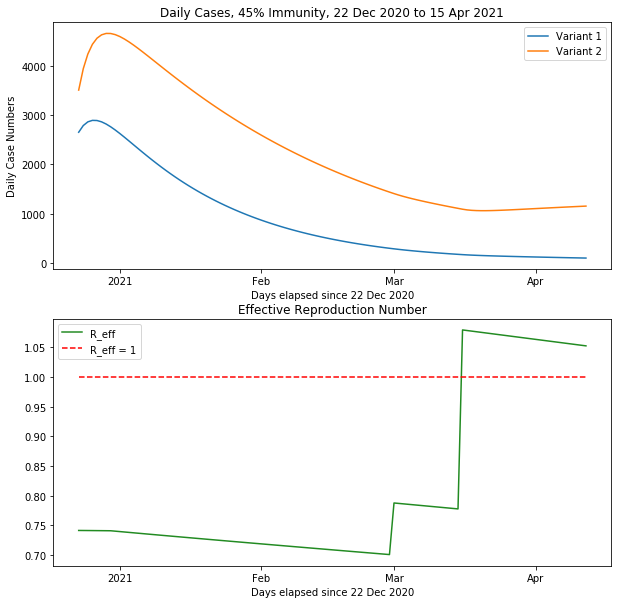

In [51]:
figa, axsa = plt.subplots(2, figsize=(10,10))

axsa[0].plot(days_elapsed, daily_cases_i1_45, label='Variant 1')
axsa[0].plot(days_elapsed, daily_cases_i2_45, label='Variant 2')
axsa[1].plot(days_elapsed, my_lista, label='R_eff', color='forestgreen')
axsa[1].plot(days_elapsed, np.ones(len(days_elapsed)), label='R_eff = 1', color='r', linestyle='dashed')

axsa[0].legend()
axsa[1].legend()

axsa[0].set_ylabel('Daily Case Numbers')
axsa[0].set_xlabel('Days elapsed since 22 Dec 2020')

axsa[1].set_xlabel('Days elapsed since 22 Dec 2020')


axsa[0].set_title('Daily Cases, 45% Immunity, 22 Dec 2020 to 15 Apr 2021')
axsa[1].set_title('Effective Reproduction Number')


month_starts = [9,40,69,100]
month_names = ['2021','Feb','Mar','Apr'] 

axsa[0].set_xticks(month_starts)
axsa[0].set_xticklabels(month_names)
axsa[1].set_xticks(month_starts)
axsa[1].set_xticklabels(month_names)

plt.savefig('Immunity 45 Trajectory')

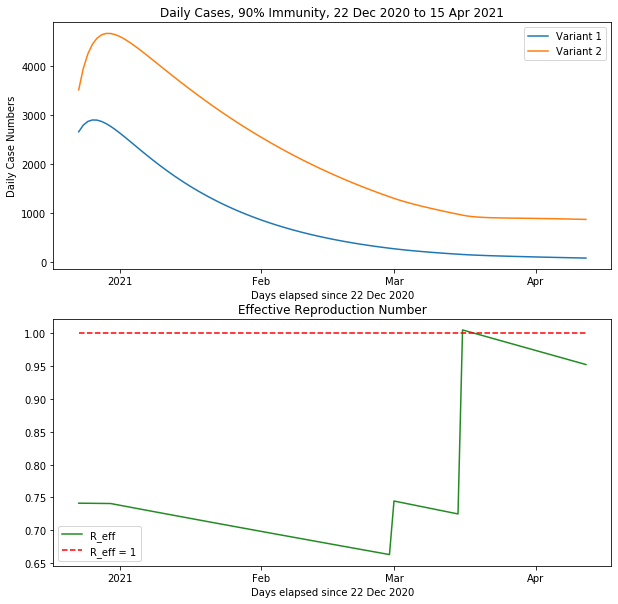

In [48]:
figa, axsa = plt.subplots(2, figsize=(10,10))
axsa[0].plot(days_elapsed, daily_cases_i1_90, label='Variant 1')
axsa[0].plot(days_elapsed, daily_cases_i2_90, label='Variant 2')
axsa[1].plot(days_elapsed, my_listb, label='R_eff', color='forestgreen')
axsa[1].plot(days_elapsed, np.ones(len(days_elapsed)), label='R_eff = 1', color='r', linestyle='dashed')

axsa[0].legend()
axsa[1].legend(loc='lower left')

axsa[0].set_ylabel('Daily Case Numbers')
axsa[0].set_xlabel('Days elapsed since 22 Dec 2020')

axsa[1].set_xlabel('Days elapsed since 22 Dec 2020')


axsa[0].set_title('Daily Cases, 90% Immunity, 22 Dec 2020 to 15 Apr 2021')
axsa[1].set_title('Effective Reproduction Number')

month_starts = [9,40,69,100]
month_names = ['2021','Feb','Mar','Apr'] 

axsa[0].set_xticks(month_starts)
axsa[0].set_xticklabels(month_names)
axsa[1].set_xticks(month_starts)
axsa[1].set_xticklabels(month_names)


plt.savefig('Immunity 90 Trajectory')

# What happens if we don't vaccinate?

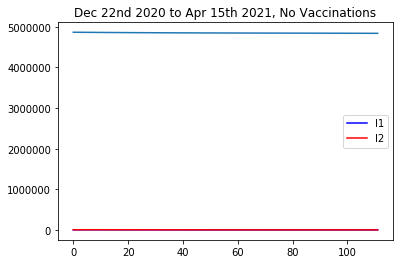

In [26]:
# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.16 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 0, 'p': 0, 'mu':0},
        ics={'i1': i1_1, 'l1': l1_1, 's': s_1, 'r': r_1, 'l2': l2_1, 'i2': i2_1, 'v':v_1},
        tdata=[7,69]) # 22 Dec 2020 to 5 Apr 2021

# computing points for plotting 
traj_2 = SEIR3.compute('test')
pts_2 = traj_2.sample()




# initial conditions on Mar 1st, sourced from model 

s_2 = pts_2['s'][-1]
l1_2 = pts_2['l1'][-1]
i1_2 = pts_2['i1'][-1]
l2_2 = pts_2['l2'][-1]
i2_2 = pts_2['i2'][-1]
r_2 = pts_2['r'][-1]
v_2 = pts_2['v'][-1]



# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.18 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 0, 'p': 0, 'mu':0},
        ics={'i1': i1_2, 'l1': l1_2, 's': s_2, 'r': r_2, 'l2': l2_2, 'i2': i2_2, 'v': v_2},
        tdata=[69,84]) 

# computing points for plotting 
traj_3 = SEIR3.compute('test')
pts_3 = traj_3.sample()


# initial conditions on Mar 1st, sourced from model 

s_3 = pts_3['s'][-1]
l1_3 = pts_3['l1'][-1]
i1_3 = pts_3['i1'][-1]
l2_3 = pts_3['l2'][-1]
i2_3 = pts_3['i2'][-1]
r_3 = pts_3['r'][-1]
v_3 = pts_3['v'][-1]



# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.25 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 0, 'p': 0, 'mu':0},
        ics={'i1': i1_3, 'l1': l1_3, 's': s_3, 'r': r_3, 'l2': l2_3, 'i2': i2_3, 'v': v_3},
        tdata=[84,112]) 

# computing points for plotting 
traj_4 = SEIR3.compute('test')
pts_4 = traj_4.sample()


daily_cases_i1_90 = np.concatenate((pts_1['i1'][1:-1:100],pts_2['i1'][1:-1:100],pts_3['i1'][1:-1:100] ,pts_4['i1'][1:-1:100]))
daily_cases_i2_90 = np.concatenate((pts_1['i2'][1:-1:100],pts_2['i2'][1:-1:100],pts_3['i2'][1:-1:100] ,pts_4['i2'][1:-1:100]))
days_elapsed = np.concatenate((pts_1['t'][1:-1:100],pts_2['t'][1:-1:100],pts_3['t'][1:-1:100] ,pts_4['t'][1:-1:100]))

S = np.concatenate((pts_1['s'][1:-1:100],pts_2['s'][1:-1:100],pts_3['s'][1:-1:100] ,pts_4['s'][1:-1:100]))

plt.plot(days_elapsed, daily_cases_i1_90, label='I1', color='b')
plt.plot(days_elapsed, daily_cases_i2_90, label='I2', color='r')
plt.plot(days_elapsed, S)
plt.title('Dec 22nd 2020 to Apr 15th 2021, No Vaccinations')
plt.legend()
plt.show()

In [29]:
S

array([4866546.98891264, 4866124.70616935, 4865670.05518542,
       4865194.49393148, 4864706.50834202, 4864212.36339828,
       4863716.66492131, 4863227.70721711, 4862738.64240347,
       4862255.55379172, 4861779.68040205, 4861311.87927966,
       4860852.72351406, 4860402.57554335, 4859961.64196695,
       4859530.01451909, 4859107.70068952, 4858694.64659441,
       4858290.75404841, 4857895.89329754, 4857509.91250548,
       4857132.64481063, 4856763.91356584, 4856403.53621885,
       4856051.32717522, 4855707.09990296, 4855370.66846855,
       4855041.84864771, 4854720.45872276, 4854406.32004082,
       4854099.25739839, 4853799.0992955 , 4853505.67809222,
       4853218.83009593, 4852938.3955923 , 4852664.21884307,
       4852396.14805109, 4852134.03530832, 4851877.73652994,
       4851627.11137604, 4851382.02317105, 4851142.3388147 ,
       4850907.92869342, 4850678.66659223, 4850454.4296012 ,
       4850235.09802841, 4850020.55531154, 4849810.68793006,
       4849605.38532251,

In [27]:
my_list4c = R_Eff(pts_4, pts_4['t'], 0, 4.665, 0.25)
my_list3c = R_Eff(pts_3, pts_3['t'], 0, 4.665, 0.18)
my_list2c = R_Eff(pts_2, pts_2['t'], 0, 4.665, 0.16)
my_list1c = R_Eff(pts_1, pts_1['t'], 0, 4.665, 0.16)

my_listc = my_list1c + my_list2c + my_list3c + my_list4c

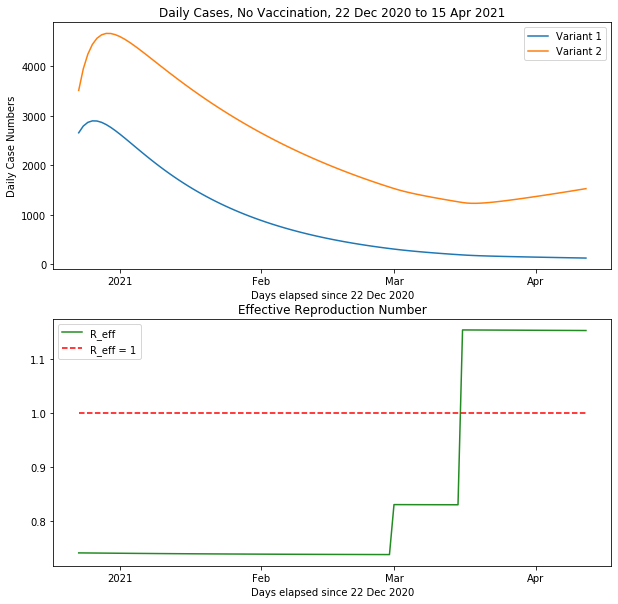

In [42]:
figa, axsa = plt.subplots(2, figsize=(10,10))
axsa[0].plot(days_elapsed, daily_cases_i1_90, label='Variant 1')
axsa[0].plot(days_elapsed, daily_cases_i2_90, label='Variant 2')
axsa[1].plot(days_elapsed, my_listc, label='R_eff', color='forestgreen')
axsa[1].plot(days_elapsed, np.ones(len(days_elapsed)), label='R_eff = 1', color='r', linestyle='dashed')

axsa[0].legend()
axsa[1].legend(loc='upper left')

axsa[0].set_ylabel('Daily Case Numbers')
axsa[0].set_xlabel('Days elapsed since 22 Dec 2020')

axsa[1].set_xlabel('Days elapsed since 22 Dec 2020')


axsa[0].set_title('Daily Cases, No Vaccination, 22 Dec 2020 to 15 Apr 2021')
axsa[1].set_title('Effective Reproduction Number')

month_starts = [9,40,69,100]
month_names = ['2021','Feb','Mar','Apr'] 

axsa[0].set_xticks(month_starts)
axsa[0].set_xticklabels(month_names)
axsa[1].set_xticks(month_starts)
axsa[1].set_xticklabels(month_names)

plt.savefig('No Vaccination Trajectory')

# Twice as fast, half the immunity

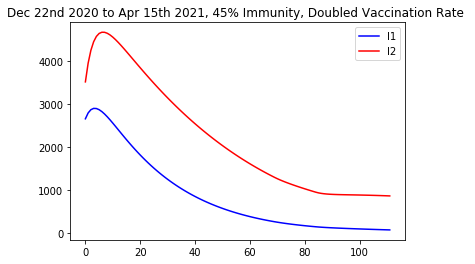

In [9]:
# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.16 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 126000/7, 'p': 0.45},
        ics={'i1': i1_1, 'l1': l1_1, 's': s_1, 'r': r_1, 'l2': l2_1, 'i2': i2_1, 'v':v_1},
        tdata=[7,69]) # 22 Dec 2020 to 5 Apr 2021

# computing points for plotting 
traj_2 = SEIR3.compute('test')
pts_2 = traj_2.sample()




# initial conditions on Mar 1st, sourced from model 

s_2 = pts_2['s'][-1]
l1_2 = pts_2['l1'][-1]
i1_2 = pts_2['i1'][-1]
l2_2 = pts_2['l2'][-1]
i2_2 = pts_2['i2'][-1]
r_2 = pts_2['r'][-1]
v_2 = pts_2['v'][-1]



# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.18 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 126000/7, 'p': 0.45},
        ics={'i1': i1_2, 'l1': l1_2, 's': s_2, 'r': r_2, 'l2': l2_2, 'i2': i2_2, 'v': v_2},
        tdata=[69,84]) 

# computing points for plotting 
traj_3 = SEIR3.compute('test')
pts_3 = traj_3.sample()


# initial conditions on Mar 1st, sourced from model 

s_3 = pts_3['s'][-1]
l1_3 = pts_3['l1'][-1]
i1_3 = pts_3['i1'][-1]
l2_3 = pts_3['l2'][-1]
i2_3 = pts_3['i2'][-1]
r_3 = pts_3['r'][-1]
v_3 = pts_3['v'][-1]



# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.25 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 126000/7, 'p': 0.45},
        ics={'i1': i1_3, 'l1': l1_3, 's': s_3, 'r': r_3, 'l2': l2_3, 'i2': i2_3, 'v': v_3},
        tdata=[84,112]) 

# computing points for plotting 
traj_4 = SEIR3.compute('test')
pts_4 = traj_4.sample()


daily_cases_i1_90 = np.concatenate((pts_1['i1'][1:-1:100],pts_2['i1'][1:-1:100],pts_3['i1'][1:-1:100] ,pts_4['i1'][1:-1:100]))
daily_cases_i2_90 = np.concatenate((pts_1['i2'][1:-1:100],pts_2['i2'][1:-1:100],pts_3['i2'][1:-1:100] ,pts_4['i2'][1:-1:100]))
days_elapsed = np.concatenate((pts_1['t'][1:-1:100],pts_2['t'][1:-1:100],pts_3['t'][1:-1:100] ,pts_4['t'][1:-1:100]))


plt.plot(days_elapsed, daily_cases_i1_90, label='I1', color='b')
plt.plot(days_elapsed, daily_cases_i2_90, label='I2', color='r')
plt.title('Dec 22nd 2020 to Apr 15th 2021, 45% Immunity, Doubled Vaccination Rate ')
plt.legend()
plt.show()